In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
data=pd.read_csv("D://datasets//Naive-Bayes-Classification-Data.csv")

In [3]:
data.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


# DATA ANALYSIS

In [4]:
data.dtypes

glucose          int64
bloodpressure    int64
diabetes         int64
dtype: object

In [5]:
print(data.shape)

(995, 3)


# data visuazlization

array([[<AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'bloodpressure'}>],
       [<AxesSubplot:title={'center':'diabetes'}>, <AxesSubplot:>]],
      dtype=object)

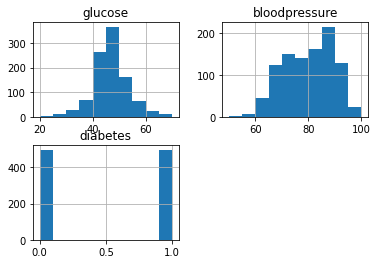

In [6]:
data.hist()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>]], dtype=object)

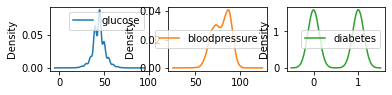

In [7]:
data.plot(kind="density",subplots=True,layout=(3,3),sharex=False)#density plot

glucose             AxesSubplot(0.125,0.657941;0.227941x0.222059)
bloodpressure    AxesSubplot(0.398529,0.657941;0.227941x0.222059)
diabetes         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
dtype: object

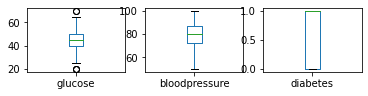

In [8]:
data.plot(kind="box",subplots=True,layout=(3,3),sharex=False,sharey=False)

In [9]:
corr=data.corr()
corr

,glucose,bloodpressure,diabetes
glucose,1.000000,-0.164553,0.031585
bloodpressure,-0.164553,1.000000,-0.808303
diabetes,0.031585,-0.808303,1.000000


array([[<AxesSubplot:xlabel='glucose', ylabel='glucose'>,
        <AxesSubplot:xlabel='bloodpressure', ylabel='glucose'>,
        <AxesSubplot:xlabel='diabetes', ylabel='glucose'>],
       [<AxesSubplot:xlabel='glucose', ylabel='bloodpressure'>,
        <AxesSubplot:xlabel='bloodpressure', ylabel='bloodpressure'>,
        <AxesSubplot:xlabel='diabetes', ylabel='bloodpressure'>],
       [<AxesSubplot:xlabel='glucose', ylabel='diabetes'>,
        <AxesSubplot:xlabel='bloodpressure', ylabel='diabetes'>,
        <AxesSubplot:xlabel='diabetes', ylabel='diabetes'>]], dtype=object)

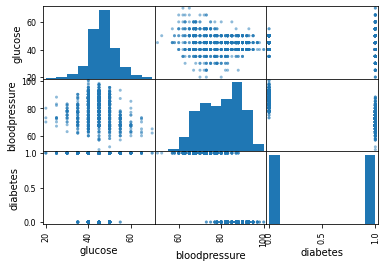

In [10]:
scatter_matrix(data)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

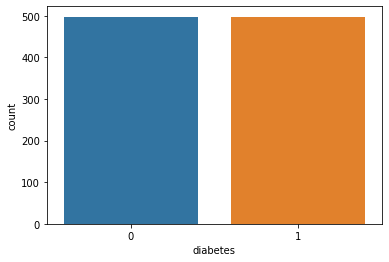

In [14]:
sns.countplot(x='diabetes',data=data)

# data wrangling

In [16]:
data.isnull().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

<AxesSubplot:>

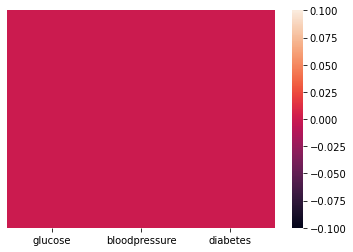

In [17]:
sns.heatmap(data.isnull(),yticklabels=False)

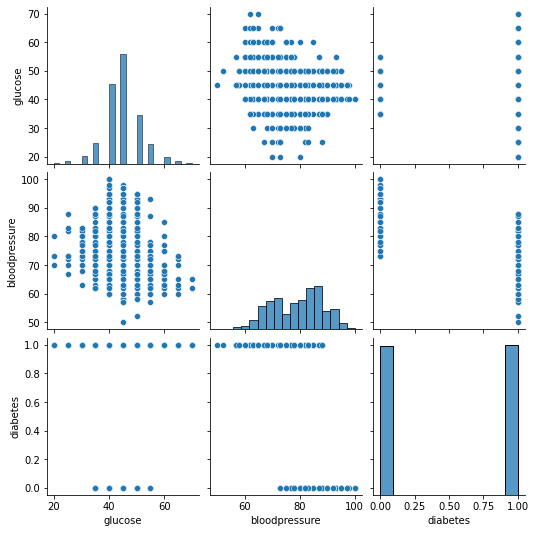

In [60]:
sns.pairplot(data)

# data preparation

In [19]:
array=data.values

In [28]:
x=data.drop("diabetes",axis=1)
y=data["diabetes"]

# model

In [62]:
from sklearn.model_selection import train_test_split
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=test_size, random_state=seed)
model = GaussianNB()

In [63]:
from sklearn.metrics import confusion_matrix
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

matrix = confusion_matrix(Y_test, predicted)
print(matrix)


[[148  11]
 [  9 161]]


In [64]:
from sklearn import metrics
print( " ACCURACY = " ,metrics.accuracy_score(Y_test,predicted))

 ACCURACY =  0.939209726443769


# testing

In [58]:
input_d=[[98,85]]
output_d=model.predict(input_d)
if(output_d==1):
    print("DIABETES")
else:
    print("NOT DIABETES")

DIABETES


In [59]:
input_d1=[[40,85]]
output_d1=model.predict(input_d1)
if(output_d1==1):
    print("DIABETES")
else:
    print("NOT DIABETES")

NOT DIABETES
